# Chronic Kidney Disease Prdiction

This project aims to develop a model that predicts whether a person has Chronic Kidney Disease or not

## Data Pre-Processing

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv(r'D:\tuansihan\06 Projects\03 Chronic Kidney Disease/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [36]:
columns = pd.read_csv(r'D:\tuansihan\06 Projects\03 Chronic Kidney Disease/data_description.txt', sep = '-')
columns = columns.reset_index()
columns.columns = ['cols', 'colName']
columns

,cols,colName
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [37]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [38]:
df.columns = columns['colName'].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [39]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [47]:
df.columns

Index(['id', 'age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [48]:
def convert_dtype(df, feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [49]:
features=['packed cell volume', 'white blood cell count', 'red blood cell count']

for feature in features:
    convert_dtype(df,feature)

In [50]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [51]:
df.drop('id', axis=1, inplace=True)

## Data Cleaning

In [53]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [54]:
def extract_cat_num(df):
    cat_col = [col for col in df.columns if df[col].dtype=='object']
    num_col = [col for col in df.columns if df[col].dtype!='object']
    return cat_col, num_col

In [63]:
# Store first list in cat_col, second list in num_col
cat_col, num_col = extract_cat_num(df)

In [64]:
# Categorical Columns
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [65]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [69]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))

red blood cells has [nan 'normal' 'abnormal'] values 
pus cell has ['normal' 'abnormal' nan] values 
pus cell clumps has ['notpresent' 'present' nan] values 
bacteria has ['notpresent' 'present' nan] values 
hypertension has ['yes' 'no' nan] values 
diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 
coronary artery disease has ['no' 'yes' '\tno' nan] values 
appetite has ['good' 'poor' nan] values 
pedal edema has ['no' 'yes' nan] values 
anemia has ['no' 'yes' nan] values 
class has ['ckd' 'ckd\t' 'notckd'] values 


In [71]:
df.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [75]:
# Replace Incorrect Values
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [77]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))

red blood cells has [nan 'normal' 'abnormal'] values  
pus cell has ['normal' 'abnormal' nan] values  
pus cell clumps has ['notpresent' 'present' nan] values  
bacteria has ['notpresent' 'present' nan] values  
hypertension has ['yes' 'no' nan] values  
diabetes mellitus has ['yes' 'no' ' yes' nan] values  
coronary artery disease has ['no' 'yes' nan] values  
appetite has ['good' 'poor' nan] values  
pedal edema has ['no' 'yes' nan] values  
anemia has ['no' 'yes' nan] values  
class has ['ckd' 'notckd'] values  


### Features Distribution

In [78]:
len(num_col)

14

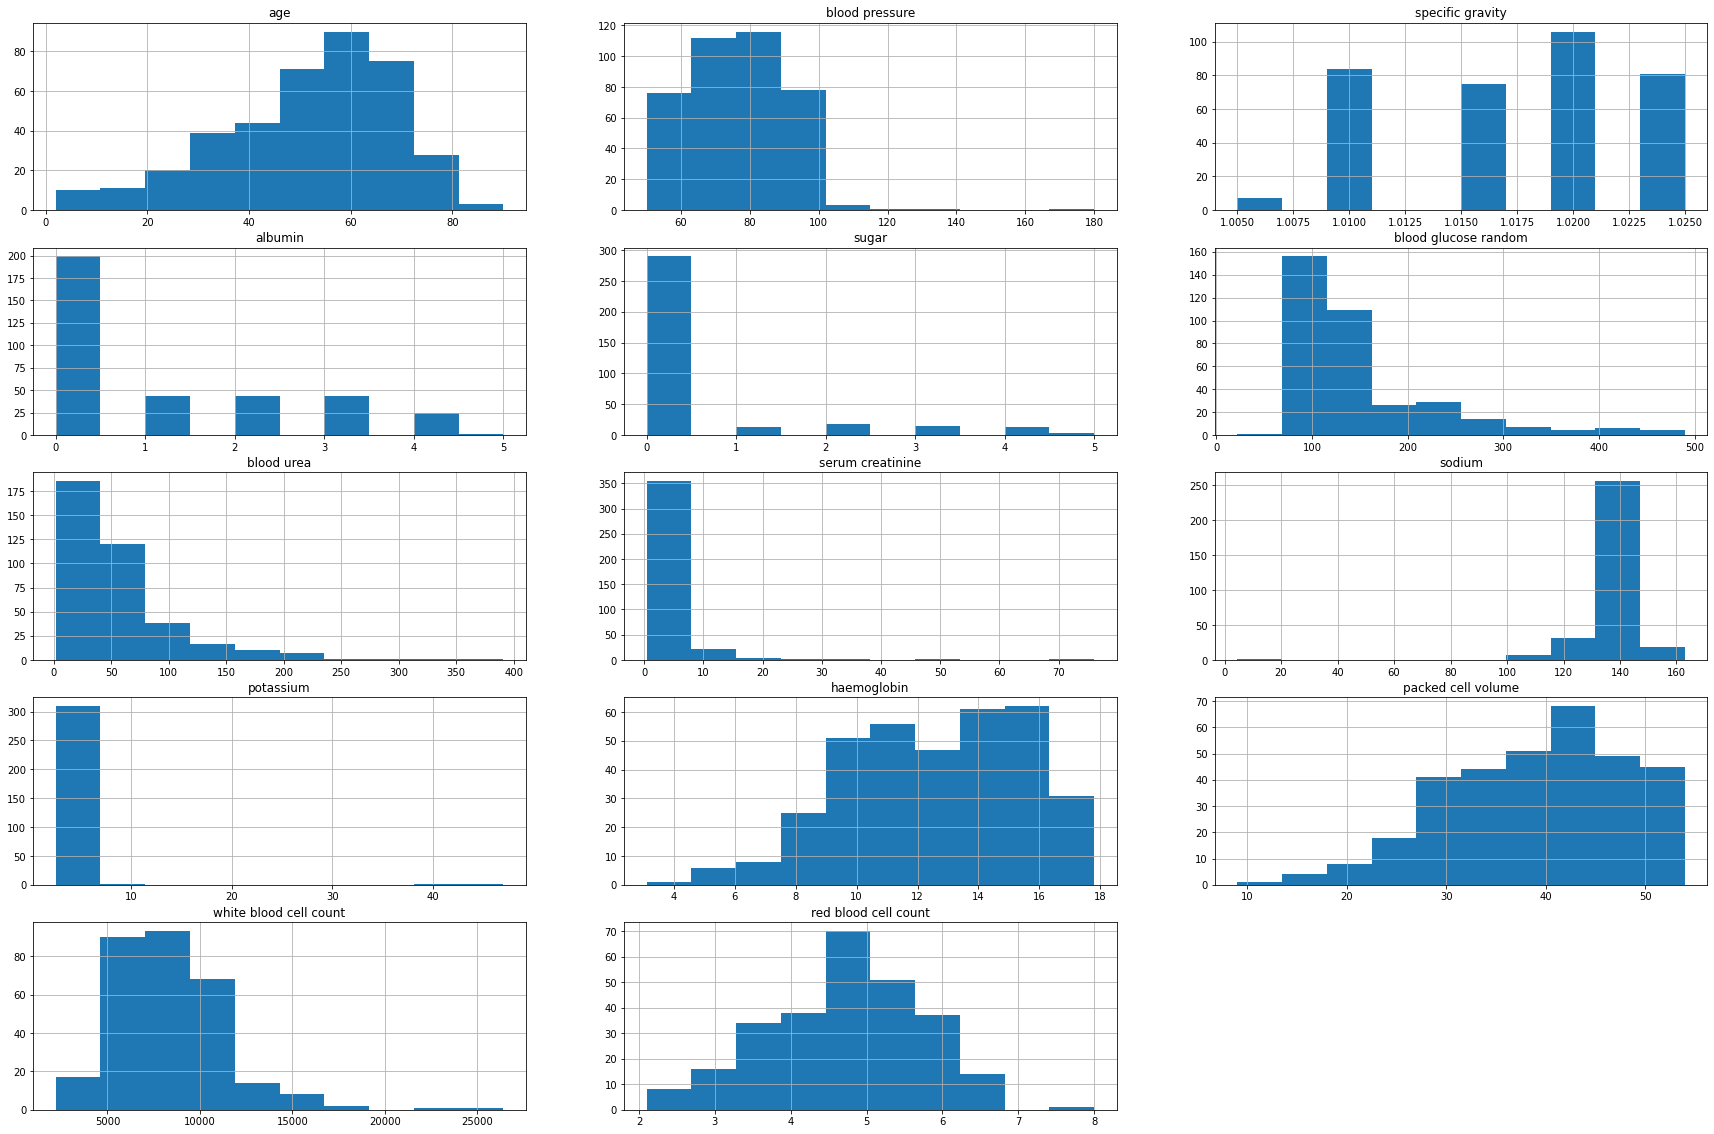

In [79]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

**Observations:**

    1. Age is Left Skewed
    
    2. Blood gluscose random is Right Skewed
    
    3. Blood Urea is also Right Skewed
    
    4. Other features are slightly skewed

### Label for Categorical Data

In [81]:
len(cat_col)

11

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tuans\anaconda3\lib\si

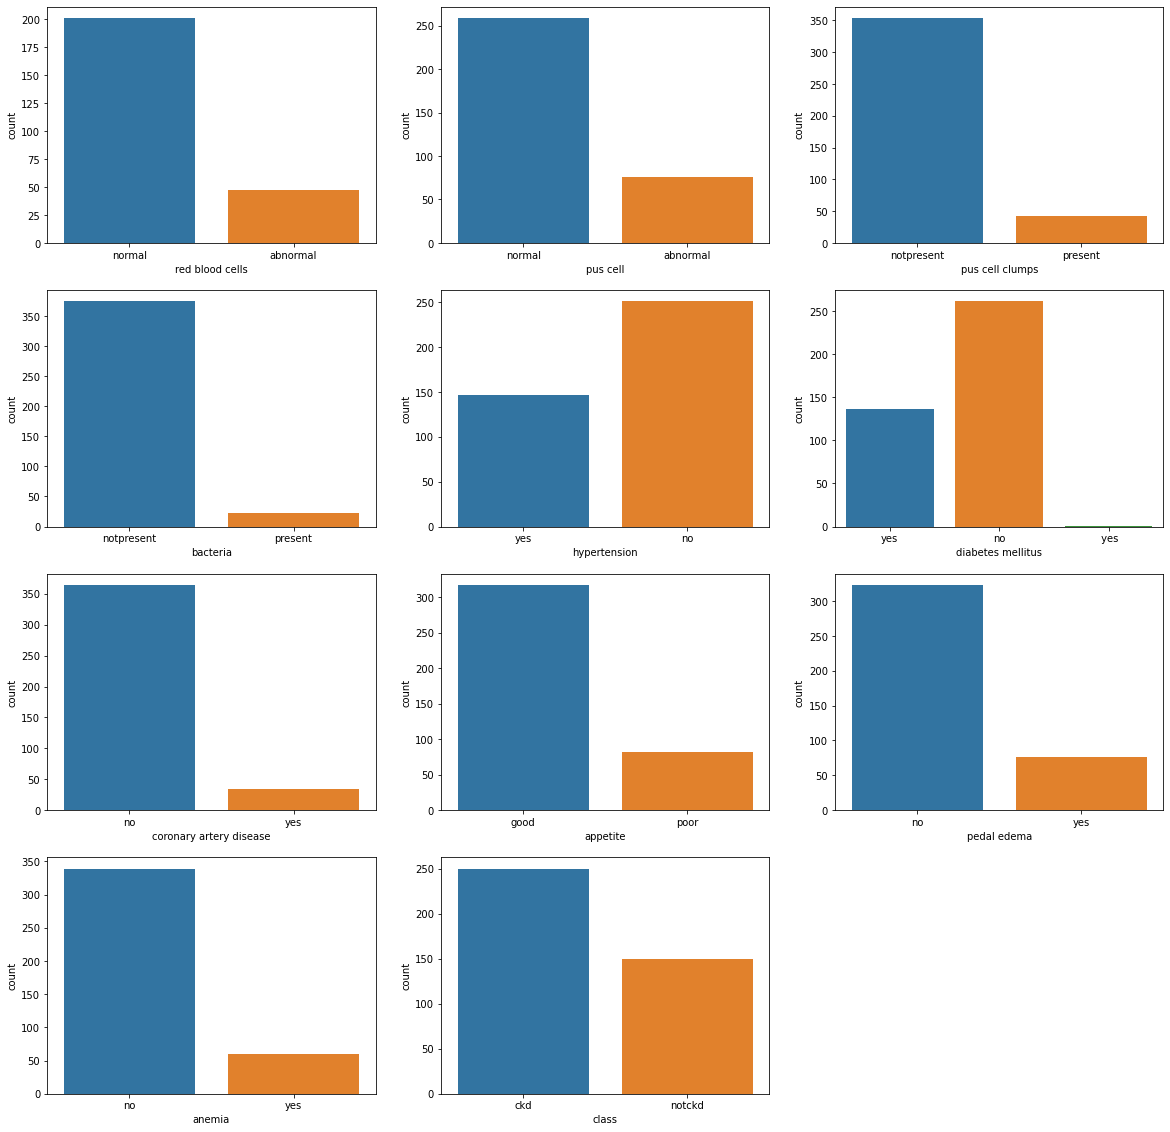

In [86]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

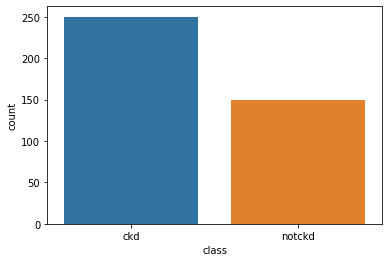

In [87]:
sns.countplot(df['class'])

Most features have imbalanced categories. Stratified folds will be necessary while cross validation.

## Identifying Correlations

In [89]:
df.corr()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood glucose random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


<AxesSubplot:>

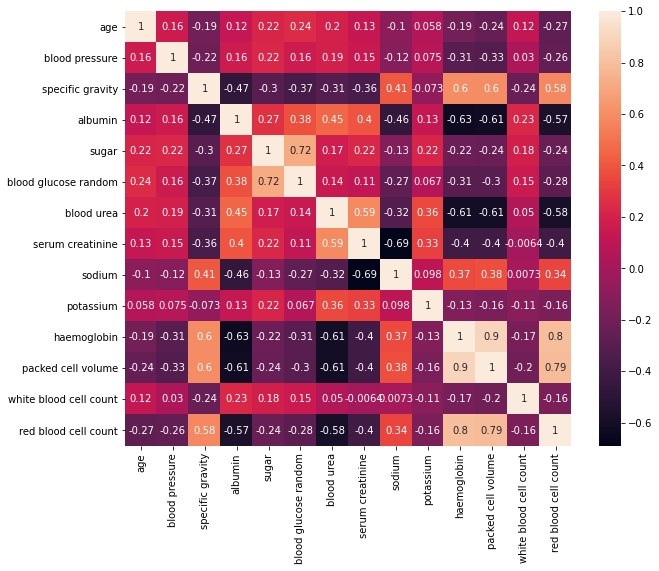

In [90]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

In [93]:
df.groupby(['red blood cells', 'class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

**Positive Correlation:**

Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin

Sugar -> Blood glucose random

Blood Urea -> Serum creatinine

Hemoglobin -> Red Blood cell count <- packed cell volume


**Negative Correlation:**

Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin

Serum creatinine -> Sodium

In [94]:
import plotly.express as px

In [95]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

In [99]:
px.violin(df, y='red blood cell count', x='class', color='class')

In [101]:
#find Relationship between Haemoglobin & Packed Cell Volume
px.scatter(df,'haemoglobin','packed cell volume')

Strong Positive Correlation between haemoglobin and packed cell volume

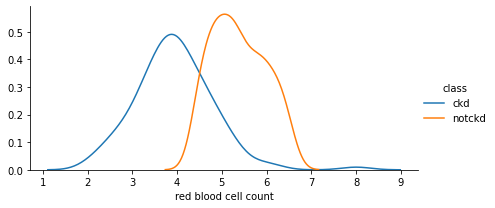

In [105]:
# analysing distribution of 'red_blood_cell_count' in both Labels 
grid=sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

We can conclude that higher red blood cells would mean no chronic kidney disease

## Automate Analysis

In [126]:
# Defining violin and scatter plot & kde_plot functions

def violin(col):
    fig = px.violin(df, y=col, x='class', color='class', box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color='class')
    return fig.show()

In [122]:
def kdeplot(feature):
    grid=sns.FacetGrid(df,hue='class',aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

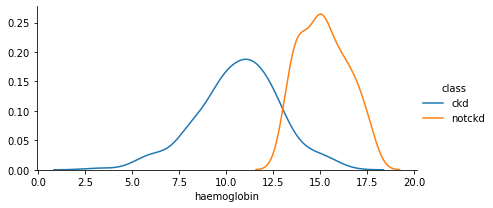

In [114]:
kdeplot('haemoglobin')

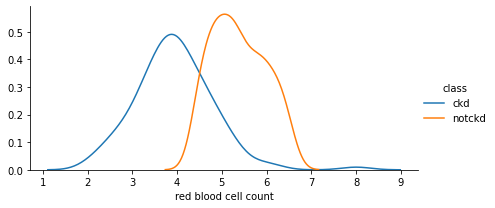

In [116]:
kdeplot('red blood cell count')

In [129]:
# Identify relationship between red blood cell count and packed cell volume
scatters('red blood cell count', 'packed cell volume')

In [130]:
# Identify relationship between packed cell volume count and haemoglobin
scatters('packed cell volume', 'haemoglobin')

1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
disease(i.e ckd).

2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
disease(i.e nockd).

In [131]:
violin('red blood cell count')

In [133]:
violin('packed cell volume')

###  Check for Negative Correlation and its impact on classes

Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [135]:
scatters('red blood cell count','albumin')

As shown, albumin levels of above **0** affect ckd largely

In [136]:
scatters('packed cell volume','blood urea')

Packed cell volume >= 40 largely affects to be non ckd

In [138]:
fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

Clearly, specific gravity **>=1.02** affects non ckd

In [139]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [140]:
# Identifying Missing Values
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
pus cell                    65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [141]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='red blood cells', ylabel='count'>

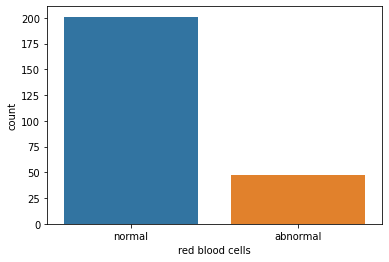

In [143]:
sns.countplot(df['red blood cells'])

In [144]:
# Make Backup of data
data=df.copy()

### Replace Missing Value with Random Value 

In [145]:
data['red blood cells'].isnull().sum()

152

In [146]:
data['red blood cells'].dropna().sample()

304    normal
Name: red blood cells, dtype: object

In [147]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

281      normal
74     abnormal
147      normal
167    abnormal
252      normal
         ...   
390      normal
367      normal
296      normal
356      normal
300      normal
Name: red blood cells, Length: 152, dtype: object

In [148]:
random_sample.index

Int64Index([281,  74, 147, 167, 252, 273, 259, 357,  36, 361,
            ...
            177, 395, 159, 388, 358, 390, 367, 296, 356, 300],
           dtype='int64', length=152)

In [150]:
random_sample.index=data[data['red blood cells'].isnull()].index
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [151]:
random_sample

0        normal
1      abnormal
5        normal
6      abnormal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [152]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [153]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='red blood cells', ylabel='count'>

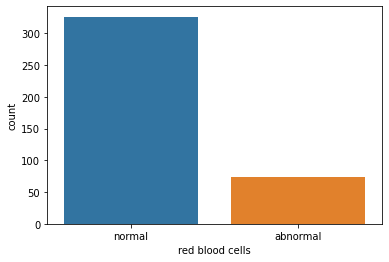

In [154]:
sns.countplot(data['red blood cells'])

In [155]:
data['red blood cells'].value_counts()/len(data)

normal      0.815
abnormal    0.185
Name: red blood cells, dtype: float64

In [156]:
len(df[df['red blood cells']=='normal'])/248

0.8104838709677419

In [158]:
len(df[df['red blood cells']=='abnormal'])/248

0.18951612903225806

In [159]:
# Automate the process with other features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [160]:
Random_value_imputation('pus cell')
Random_value_imputation('red blood cells')

In [161]:
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            4
bacteria                   4
hypertension               2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [162]:
# Fill missing values with mode as minimal missing values
mode=data['pus cell clumps'].mode()[0]
mode

'notpresent'

In [ ]:
data['pus cell clumps']=data['pus cell clumps'].fillna(mode)

In [163]:
# Automate the process
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [164]:
for col in cat_col:
    impute_mode(col)

In [165]:
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

No missing values in Categorical Features

In [166]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [167]:
# Replacing missing values in Numerical Features with Random Values
for col in num_col:
    Random_value_imputation(col)

In [168]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

### Feature Encoding

In [176]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [ ]:
#As we have 2 categories in each feature, we can consider Label Encoder as it will not cause Curse of Dimensionality

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
le = LabelEncoder()

In [179]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [180]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,303.0,...,38.0,6000.0,6.0,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


## Feature Importance

In [182]:
#SelectKBest-to select k best features

In [183]:
#chi2-Internally this class is going to check that whether p-value is less than 0.05 or not
#based on that,it will actually order all the features

In [184]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [185]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [186]:
X=data[ind_col]
y=data[dep_col]

In [187]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [188]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000002D60674C9D0>)

In [190]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([1.03461149e+02, 7.47650773e+01, 5.48224458e-03, 2.19270925e+02,
       1.03800000e+02, 9.36523517e+00, 1.38744086e+01, 2.52000000e+01,
       1.32000000e+01, 2.53290958e+03, 2.34887528e+03, 3.40598471e+02,
       3.08308509e+01, 3.06965701e+00, 1.20014401e+02, 3.09923986e+02,
       1.24136409e+04, 2.27014496e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [191]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,103.461149
1,74.765077
2,0.005482
3,219.270925
4,103.800000
5,9.365235
6,13.874409
7,25.200000
8,13.200000
9,2532.909582


In [192]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [193]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [195]:
features_rank

,0,Score
0,age,103.461149
1,blood pressure,74.765077
2,specific gravity,0.005482
3,albumin,219.270925
4,sugar,103.800000
5,red blood cells,9.365235
6,pus cell,13.874409
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2532.909582


In [196]:
#Higher the score is,more important feature is 

In [197]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,103.461149
1,blood pressure,74.765077
2,specific gravity,0.005482
3,albumin,219.270925
4,sugar,103.800000
5,red blood cells,9.365235
6,pus cell,13.874409
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2532.909582


In [198]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

,Features,Score
16,white blood cell count,12413.640909
9,blood glucose random,2532.909582
10,blood urea,2348.875275
11,serum creatinine,340.598471
15,packed cell volume,309.923986
3,albumin,219.270925
14,haemoglobin,120.014401
4,sugar,103.800000
0,age,103.461149
18,hypertension,88.200000


In [199]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [200]:
X_new=data[selected_columns]

### Model Building

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [202]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [203]:
## check whether dataset is imbalance or not
y_train.value_counts()

0    185
1    115
Name: class, dtype: int64

In [207]:
### Lets find best model using Hyperparameter optimization
!pip install xgboost

In [208]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [209]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [210]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [212]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [213]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [214]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [215]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [216]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [217]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [218]:
classifier.fit(X_train,y_train)

[13:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [219]:
y_pred=classifier.predict(X_test)

In [220]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [221]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[61  4]
 [ 0 35]]


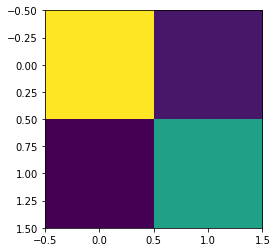

In [222]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [223]:
accuracy_score(y_test, y_pred)

0.96